In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import tensorflow_probability as tfp
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt

In [ ]:
# DATA=[]
# for folder,mask in zip((os.listdir('/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/capsnet-keras/Original')),
#   os.listdir('/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/Segmented')):
#   for file_im,file_mask in zip(os.listdir(f'/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/capsnet-keras/Original/{folder}'),
#     os.listdir(f'/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/Segmented/{mask}')
#                                ):
#     img=cv2.imread(f'/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/capsnet-keras/Original/{folder}/{file_im}')
#     img=cv2.resize(img,(128,128))
#     mk=cv2.imread(f'/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/Segmented/{mask}/{file_mask}')
#     mk=cv2.resize(mk,(128,128))
#     DATA.append((img/255.0,mk/255.0))
# DATA=np.array(DATA)
# DATA=shuffle(DATA)

In [ ]:
IMAGES_DATA=[]
for label,folder in enumerate(os.listdir('/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/capsnet-keras/Original')):
  for file in os.listdir(f'/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/capsnet-keras/Original/{folder}'):
    img=cv2.imread(f'/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/capsnet-keras/Original/{folder}/{file}')
    img=cv2.resize(img,(128,128))
    IMAGES_DATA.append((img/255.0,label))
IMAGES_DATA=np.array(IMAGES_DATA)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


In [ ]:
IMAGES_DATA.shape

(3256, 2)

In [ ]:
mask_DATA=[]
for label,mask in enumerate(os.listdir('/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/Segmented')):
  for mask_file in os.listdir(f'/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/Segmented/{mask}'):
    img=cv2.imread(f'/content/drive/MyDrive/DataSets/Acute Leukemia Cancer Data/Segmented/{mask}/{mask_file}')
    img=cv2.resize(img,(128,128))
    mask_DATA.append((np.round(img/255.0),label))
mask_DATA=np.array(mask_DATA)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


In [ ]:
mask_DATA.shape

(3256, 2)

In [ ]:
DATA=np.array([(image,mask,label) for image,mask,label in zip(IMAGES_DATA[:,0],mask_DATA[:,0],IMAGES_DATA[:,1])])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
DATA=shuffle(DATA)

In [ ]:
DATA.shape

(3256, 3)

In [ ]:
IMAGES=np.array([ i for i in DATA[:,0]]).reshape(3256,128,128,3)
MASKS=np.array([ i for i in DATA[:,1]]).reshape(3256,128,128,3)
LABEL=DATA[:,2]

In [ ]:
IMAGES.shape

(3256, 128, 128, 3)

In [ ]:
MASKS.shape

(3256, 128, 128, 3)

In [ ]:
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(2,4,1)
plt.imshow(IMAGES[0])
plt.subplot(2,4,2)
plt.imshow(MASKS[0])
plt.subplot(2,4,3)
plt.imshow(IMAGES[190])
plt.subplot(2,4,4)
plt.imshow(MASKS[190])
plt.subplot(2,4,5)
plt.imshow(IMAGES[230])
plt.subplot(2,4,6)
plt.imshow(MASKS[230])
plt.subplot(2,4,7)
plt.imshow(IMAGES[2310])
plt.subplot(2,4,8)
plt.imshow(MASKS[2310])

plt.show()

In [ ]:
x_train,x_test,x_label,y_label=IMAGES[:2600],IMAGES[2600:],LABEL[:2600],LABEL[2600:]
y_train,y_test=np.round(MASKS[:2600]),np.round(MASKS[2600:])

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2600, 128, 128, 3),
 (656, 128, 128, 3),
 (2600, 128, 128, 3),
 (656, 128, 128, 3))

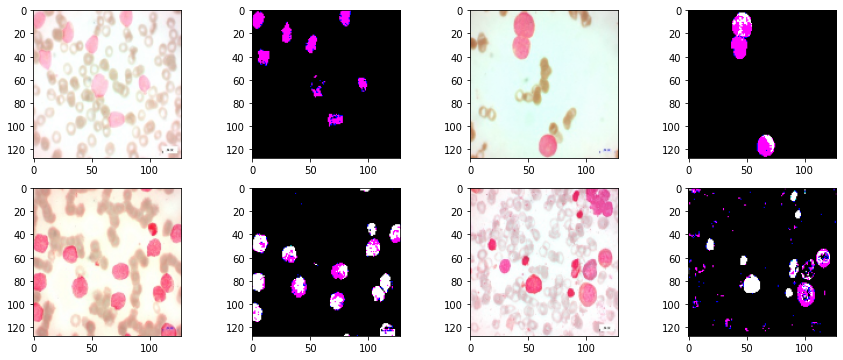

In [ ]:
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(2,4,1)
plt.imshow(x_train[1183])
plt.subplot(2,4,2)
plt.imshow(y_train[1183])
plt.subplot(2,4,3)
plt.imshow(x_train[157])
plt.subplot(2,4,4)
plt.imshow(y_train[157])
plt.subplot(2,4,5)
plt.imshow(x_train[768])
plt.subplot(2,4,6)
plt.imshow(y_train[768])
plt.subplot(2,4,7)
plt.imshow(x_train[2100])
plt.subplot(2,4,8)
plt.imshow(y_train[2100])

plt.show()

In [ ]:
plt.imshow(y_train[768]*x_train[768])

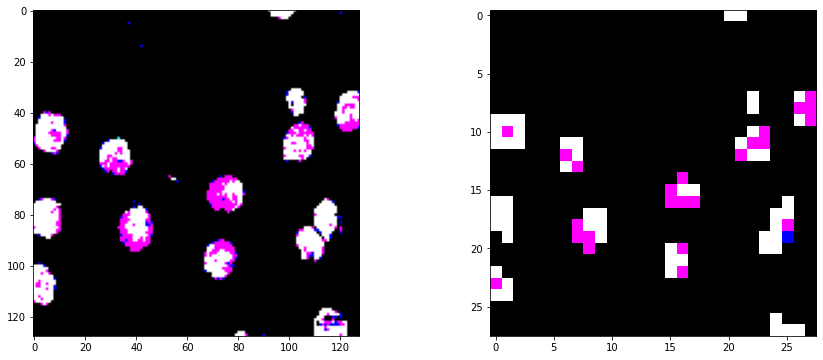

In [ ]:
plt.subplot(1,2,1)
plt.imshow( y_train[768])
plt.subplot(1,2,2)
plt.imshow(np.round(cv2.resize(y_train[768],(28,28))))
plt.show()

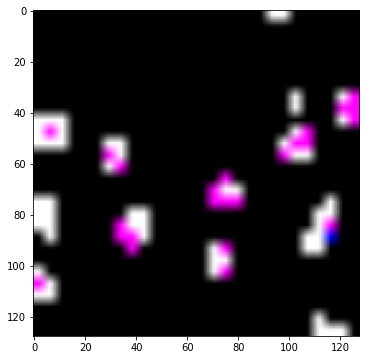

In [ ]:
plt.imshow(cv2.resize(np.round(cv2.resize(y_train[768],(28,28))),(128,128)))

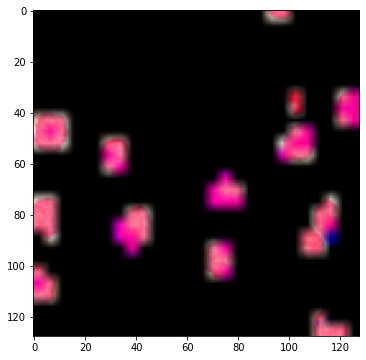

In [ ]:

plt.imshow(x_train[768]*cv2.resize(np.round(cv2.resize(y_train[768],(28,28))),(128,128)))

## Architecture

In [ ]:
def SE_BLOCK(in_block, ch, ratio=16):
    x = keras.layers.GlobalAveragePooling2D()(in_block)
    x = keras.layers.Dense(ch//ratio,activation='relu')(x)
    x = keras.layers.Dense(ch,activation='sigmoid')(x)
    x = tf.reshape(x, shape=[-1, 1, 1, ch], name='scaler')
    return keras.layers.multiply([in_block, x])

In [ ]:
INP=keras.layers.Input(shape=(128,128,3))
se_block_1=SE_BLOCK(INP,3)
enc_conv_1=keras.layers.Conv2D(16,(3,3),padding='same',activation='relu')(se_block_1)
pad_1=keras.layers.MaxPooling2D((2,2))(enc_conv_1)
se_block_2=SE_BLOCK(pad_1,16)
enc_conv_1=keras.layers.Conv2D(16,(3,3),padding='same',activation='relu')(se_block_1)
pad_1=keras.layers.MaxPooling2D((2,2))(enc_conv_1)
se_block_3=SE_BLOCK(pad_1,16)
flat=keras.layers.Flatten()(keras.layers.concatenate([se_block_2,se_block_3]))
enc_dense_1=keras.layers.Dense(128,activation='relu')(flat)
BN=keras.layers.BatchNormalization()(enc_dense_1)
enc_dense_2=keras.layers.Dense(64,activation='relu')(BN)
BN_=keras.layers.BatchNormalization()(enc_dense_2)
enc_dense_3=keras.layers.Dense(32,activation='relu')(BN_)
embedding=keras.layers.Dense(2,activation='sigmoid')(enc_dense_3)
Encoder=keras.models.Model([INP],[embedding])


dec_inp=keras.layers.Input(shape=[2])
dec_dense_1=keras.layers.Dense(256,activation='relu')(dec_inp)
dec_dense_2=keras.layers.Dense(128,activation='relu')(dec_dense_1)
dec_dense_3=keras.layers.Dense(64,activation='relu')(dec_dense_2)
dec_bn_1=keras.layers.BatchNormalization()(dec_dense_3)
dec_dense_4=keras.layers.Dense(32,activation='relu')(dec_bn_1)
dec_dense_5=keras.layers.Dense(128*128*3,activation='sigmoid')(dec_dense_4)
reshape=keras.layers.Reshape((128,128,3))(dec_dense_5)
Decoder=keras.models.Model([dec_inp],[reshape])

AUTOENCODER=keras.models.Model([Encoder.input],[Decoder(Encoder.output)])

In [ ]:
plot_model(AUTOENCODER,to_file='ALL_Sagmentaton.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


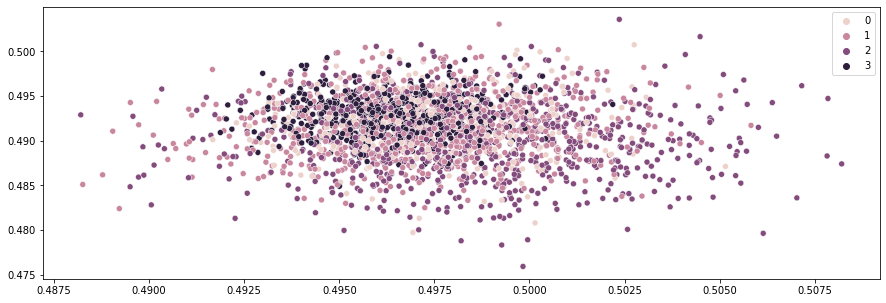

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize']=(15,5)
encoded=Encoder(x_train)
class_names=np.array([0,1,2,3])
sns.scatterplot(encoded[:,0],encoded[:,1],hue=class_names[np.array(x_label,dtype=np.int)])
plt.show()

In [ ]:
from keras import backend as K
def dice_coeff(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)
  return 1 - numerator / denominator
def LOSS(y_true,y_pred):
  return keras.losses.BinaryCrossentropy(y_true,y_pred)+dice_coeff(y_true,y_pred)

In [ ]:
AUTOENCODER.compile(optimizer=keras.optimizers.Adam(lr=0.0001),
                    loss='binary_crossentropy',metrics=['accuracy'])
Hist=AUTOENCODER.fit(x_train,y_train,epochs=50)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
pd.DataFrame(Hist.history).plot()
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize']=(15,5)
encoded=Encoder(x_train[:2000])
class_names=np.array([0,1,2,3])
sns.scatterplot(encoded[:,0],encoded[:,1],hue=class_names[np.array(x_label[:2000],dtype=np.int)])
plt.show()

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize']=(15,5)
encoded=Encoder(x_test)
class_names=np.array([0,1,2,3])
sns.scatterplot(encoded[:,0],encoded[:,1],hue=class_names[np.array(y_label,dtype=np.int)])
plt.show()

In [ ]:
AUTOENCODER.evaluate(x_test,y_test)

## Visualization

In [ ]:
preds=AUTOENCODER.predict(x_test)

In [ ]:
preds=AUTOENCODER.predict(x_test)
plt.rcParams['figure.figsize']=(16,7)
for i in range(5):
  plt.subplot(2,5,i+1)
  plt.imshow((y_test[i]).reshape(128,128,3))
  plt.title('Actual')
  plt.subplot(2,5,i+6)
  plt.imshow(np.array(preds[i]).reshape(128,128,3))
  plt.title('Preds')
plt.show()

In [ ]:
plt.rcParams['figure.figsize']=(16,7)
for i in range(5):
  plt.subplot(2,5,i+1)
  plt.imshow((y_test[i+100]).reshape(128,128,3))
  plt.title('Actual')
  plt.subplot(2,5,i+6)
  plt.imshow(np.array(preds[i+100]).reshape(128,128,3))
  plt.title('Preds')
plt.show()

In [ ]:
plt.rcParams['figure.figsize']=(16,7)
for i in range(5):
  plt.subplot(2,5,i+1)
  plt.imshow((y_test[i+133]).reshape(128,128,3))
  plt.title('Actual')
  plt.subplot(2,5,i+6)
  plt.imshow(np.array(preds[i+133]).reshape(128,128,3))
  plt.title('Preds')
plt.show()

## Second Architecture

In [ ]:
from tensorflow.keras import activations

In [ ]:
INP=keras.layers.Input(shape=(128,128,3))
se_block_1=SE_BLOCK(INP,3)
enc_conv_1=keras.layers.Conv2D(16,(3,3),padding='same',activation='relu')(se_block_1)
pad_1=keras.layers.MaxPooling2D((2,2))(enc_conv_1)
se_block_2=SE_BLOCK(pad_1,16)
enc_conv_1=keras.layers.Conv2D(16,(3,3),padding='same',activation='relu')(se_block_1)
pad_1=keras.layers.MaxPooling2D((2,2))(enc_conv_1)
se_block_3=SE_BLOCK(pad_1,16)
flat=keras.layers.Flatten()(keras.layers.concatenate([se_block_2,se_block_3]))
enc_dense_1=keras.layers.Dense(256,activation='relu')(flat)
BN=keras.layers.BatchNormalization()(enc_dense_1)
enc_dense_2=keras.layers.Dense(128,activation='relu')(BN)
BN_=keras.layers.BatchNormalization()(enc_dense_2)
enc_dense_3=keras.layers.Dense(64,activation='relu')(BN_)
embedding=keras.layers.Dense(2,activation='sigmoid')(enc_dense_3)
Encoder=keras.models.Model([INP],[embedding])

Decoder=keras.models.Sequential([
                            keras.layers.Input(shape=[2]),
  keras.layers.Dense(128,activation='selu'),keras.layers.Reshape((4,4,8)),
  keras.layers.Conv2DTranspose(32,(3,3)),
  keras.layers.Conv2DTranspose(16,(3,3)),
  keras.layers.UpSampling2D(),keras.layers.Conv2DTranspose(16,(3,3)),
  keras.layers.Conv2DTranspose(3,(3,3)),keras.layers.Conv2DTranspose(16,(3,3)),
  keras.layers.Conv2DTranspose(3,(3,3)), keras.layers.UpSampling2D(),
  keras.layers.Conv2DTranspose(16,(3,3)),
  keras.layers.Conv2DTranspose(3,(3,3)),
  keras.layers.Conv2DTranspose(16,(3,3)),
  keras.layers.Conv2DTranspose(3,(3,3)),
  keras.layers.Conv2DTranspose(16,(3,3)),
  keras.layers.Conv2DTranspose(3,(3,3)),
  keras.layers.Conv2DTranspose(16,(3,3)),
  keras.layers.Conv2DTranspose(3,(3,3)),
                            keras.layers.UpSampling2D(),
            keras.layers.Activation(activations.relu)
])
AUTOENCODER=keras.models.Model([Encoder.input],[Decoder(Encoder.output)])

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize']=(15,5)
encoded=Encoder(x_train)
class_names=np.array([0,1,2,3])
sns.scatterplot(encoded[:,0],encoded[:,1],hue=class_names[np.array(x_label,dtype=np.int)])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [ ]:
AUTOENCODER.compile(optimizer=keras.optimizers.Adagrad(lr=0.001),
                    loss=['binary_crossentropy'],metrics=['accuracy'])
Hist=AUTOENCODER.fit(x_train,y_train,epochs=50)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


Epoch 1/50
82/82 [==============================] - 8s 42ms/step - loss: 0.3589 - accuracy: 0.2208
Epoch 2/50
82/82 [==============================] - 3s 36ms/step - loss: 0.2774 - accuracy: 0.2020
Epoch 3/50
82/82 [==============================] - 3s 35ms/step - loss: 0.2592 - accuracy: 0.2053
Epoch 4/50
82/82 [==============================] - 3s 36ms/step - loss: 0.2542 - accuracy: 0.2274
Epoch 5/50
82/82 [==============================] - 3s 36ms/step - loss: 0.2521 - accuracy: 0.2398
Epoch 6/50
82/82 [==============================] - 3s 36ms/step - loss: 0.2506 - accuracy: 0.2510
Epoch 7/50
82/82 [==============================] - 3s 36ms/step - loss: 0.2493 - accuracy: 0.2493
Epoch 8/50
82/82 [==============================] - 3s 36ms/step - loss: 0.2482 - accuracy: 0.2500
Epoch 9/50
82/82 [==============================] - 3s 36ms/step - loss: 0.2473 - accuracy: 0.2489
Epoch 10/50
82/82 [==============================] - 3s 36ms/step - loss: 0.2465 - accuracy: 0.2392
Epoch 11/

In [ ]:
pd.DataFrame(Hist.history).plot()
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


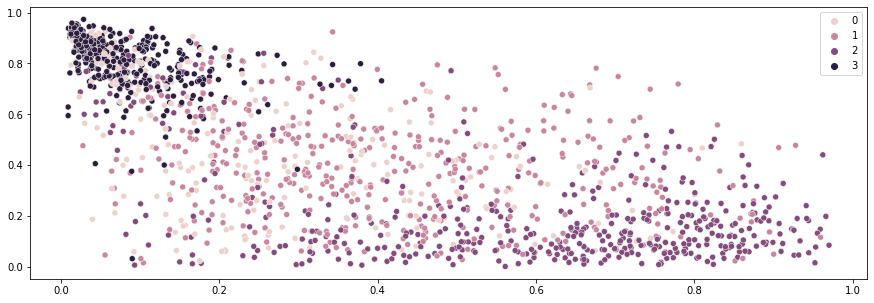

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize']=(15,5)
encoded=Encoder(x_train[:1500])
class_names=np.array([0,1,2,3])
sns.scatterplot(encoded[:,0],encoded[:,1],hue=class_names[np.array(x_label[:1500],dtype=np.int)])
plt.show()

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize']=(15,5)
encoded=Encoder(x_test)
class_names=np.array([0,1,2,3])
sns.scatterplot(encoded[:,0],encoded[:,1],hue=class_names[np.array(y_label,dtype=np.int)])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [ ]:
AUTOENCODER.evaluate(x_test,y_test)

21/21 [==============================] - 1s 25ms/step - loss: 0.2241 - accuracy: 0.1926


[0.2241320013999939, 0.19264547526836395]

In [ ]:
preds=AUTOENCODER.predict(x_test)

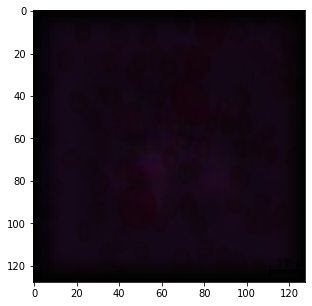

In [ ]:
plt.imshow(preds[0]*x_test[0])

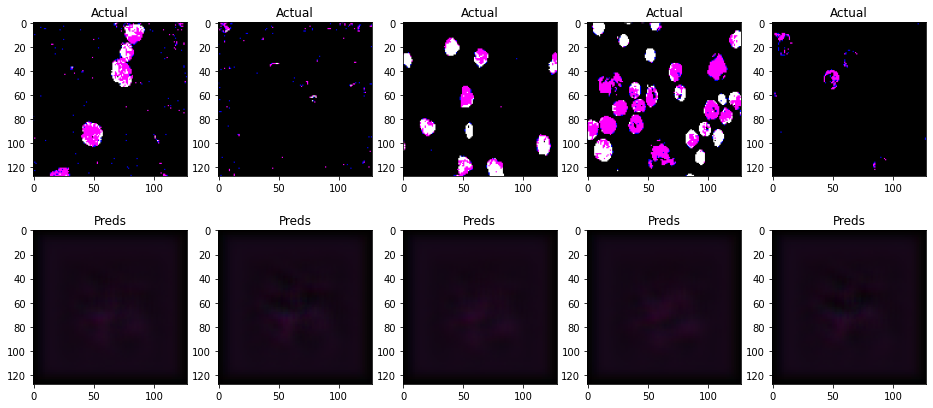

In [ ]:
plt.rcParams['figure.figsize']=(16,7)
for i in range(5):
  plt.subplot(2,5,i+1)
  plt.imshow((y_test[i]))
  plt.title('Actual')
  plt.subplot(2,5,i+6)
  plt.imshow(preds[i])
  plt.title('Preds')
plt.show()

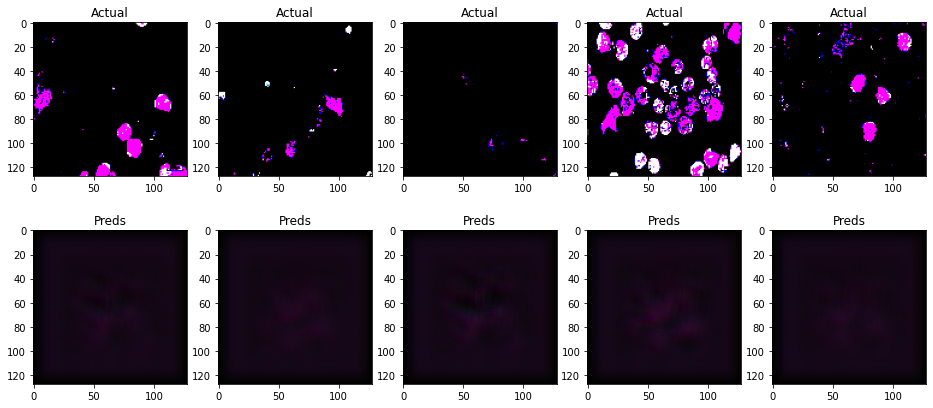

In [ ]:
plt.rcParams['figure.figsize']=(16,7)
for i in range(5):
  plt.subplot(2,5,i+1)
  plt.imshow((y_test[i+100]).reshape(128,128,3))
  plt.title('Actual')
  plt.subplot(2,5,i+6)
  plt.imshow(np.array(preds[i+100]).reshape(128,128,3))
  plt.title('Preds')
plt.show()

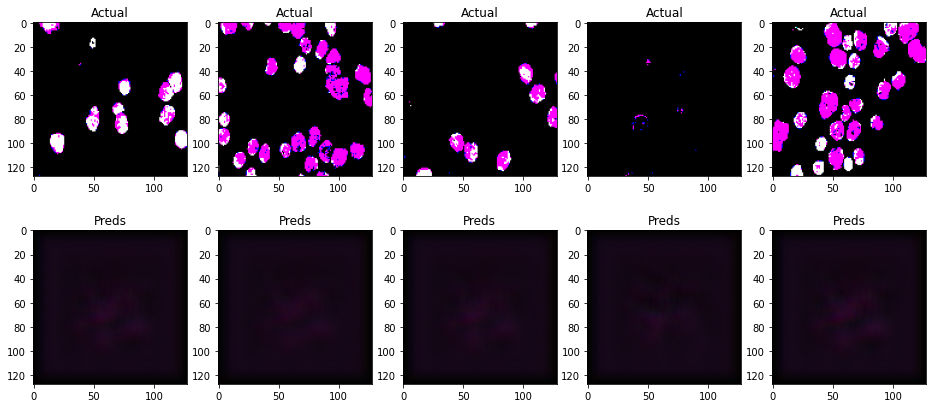

In [ ]:
plt.rcParams['figure.figsize']=(16,7)
for i in range(5):
  plt.subplot(2,5,i+1)
  plt.imshow((y_test[i+133]).reshape(128,128,3))
  plt.title('Actual')
  plt.subplot(2,5,i+6)
  plt.imshow(np.array(preds[i+133]).reshape(128,128,3))
  plt.title('Preds')
plt.show()

## Variational AutoEncoder

In [ ]:
img_size = 128
num_channels = 3
latent_space_dim=2

x = keras.layers.Input(shape=(img_size, img_size, num_channels), name="encoder_input")

encoder_conv_layer1 = keras.layers.Conv2D(filters=1, kernel_size=(3, 3), padding="same", strides=1, name="encoder_conv_1")(x)
encoder_norm_layer1 = keras.layers.BatchNormalization(name="encoder_norm_1")(encoder_conv_layer1)
encoder_activ_layer1 = keras.layers.ReLU(name="encoder_leakyrelu_1")(encoder_norm_layer1)


encoder_conv_layer2 = keras.layers.Conv2D(filters=8, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_2")(encoder_activ_layer1)
encoder_norm_layer2 = keras.layers.BatchNormalization(name="encoder_norm_2")(encoder_conv_layer2)
encoder_activ_layer2 = keras.layers.ReLU(name="encoder_activ_layer_2")(encoder_norm_layer2)


encoder_conv_layer3 = keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", strides=2, name="encoder_conv_3")(encoder_activ_layer2)
encoder_norm_layer3 = keras.layers.BatchNormalization(name="encoder_norm_3")(encoder_conv_layer3)
encoder_activ_layer3 = keras.layers.ReLU(name="encoder_activ_layer_3")(encoder_norm_layer3)


encoder_conv_layer4 = keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", strides=2, name="encoder_conv_4")(encoder_activ_layer3)
encoder_norm_layer4 = keras.layers.BatchNormalization(name="encoder_norm_4")(encoder_conv_layer4)
encoder_activ_layer4 = keras.layers.ReLU(name="encoder_activ_layer_4")(encoder_norm_layer4)


encoder_conv_layer5 = keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_5")(encoder_activ_layer4)
encoder_norm_layer5 = keras.layers.BatchNormalization(name="encoder_norm_5")(encoder_conv_layer5)
encoder_activ_layer5 = keras.layers.ReLU(name="encoder_activ_layer_5")(encoder_norm_layer5)

shape_before_flatten = keras.backend.int_shape(encoder_activ_layer5)[1:]
encoder_flatten = keras.layers.Flatten()(encoder_activ_layer5)

dense_1 = keras.layers.Dense(units=128,activation='relu', name="encoder_dense")(encoder_flatten)
dense_2=keras.layers.Dense(units=64,activation='relu', name="encoder_dense_")(dense_1)
encoder_output = keras.layers.Dense(units=latent_space_dim, name="encoder_log_variance",
                                    activation='sigmoid')(dense_2)

encoder = keras.models.Model(x, encoder_output, name="encoder_model")

In [ ]:
decoder_input = keras.layers.Input(shape=(latent_space_dim), name="decoder_input")
decoder_dense_layer1 = keras.layers.Dense(units=np.prod(shape_before_flatten), name="decoder_dense_1")(decoder_input)
decoder_reshape = keras.layers.Reshape(target_shape=shape_before_flatten)(decoder_dense_layer1)

decoder_conv_tran_layer1 = keras.layers.Conv2DTranspose(filters=16, kernel_size=(3, 3), padding="same", strides=1, name="decoder_conv_tran_1")(decoder_reshape)
decoder_norm_layer1 = keras.layers.BatchNormalization(name="decoder_norm_1")(decoder_conv_tran_layer1)
decoder_activ_layer1 = keras.layers.ReLU(name="decoder_leakyrelu_1")(decoder_norm_layer1)

decoder_conv_tran_layer2 = keras.layers.Conv2DTranspose(filters=32, kernel_size=(3, 3), padding="same", strides=2, name="decoder_conv_tran_2")(decoder_activ_layer1)
decoder_norm_layer2 = keras.layers.BatchNormalization(name="decoder_norm_2")(decoder_conv_tran_layer2)
decoder_activ_layer2 = keras.layers.ReLU(name="decoder_leakyrelu_2")(decoder_norm_layer2)

decoder_conv_tran_layer3 = keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), padding="same", strides=2, name="decoder_conv_tran_3")(decoder_activ_layer2)
decoder_norm_layer3 = keras.layers.BatchNormalization(name="decoder_norm_3")(decoder_conv_tran_layer3)
decoder_activ_layer3 = keras.layers.ReLU(name="decoder_leakyrelu_3")(decoder_norm_layer3)

decoder_output = keras.layers.Conv2DTranspose(filters=3, kernel_size=(3, 3), padding="same", strides=1,activation='sigmoid', name="decoder_conv_tran_4")(decoder_activ_layer3)
# decoder_activ_layer4 = keras.layers.LeakyReLU(name="decoder_leakyrelu_3")(decoder_output) 
decoder = keras.models.Model(decoder_input, decoder_output, name="decoder_model")

In [ ]:
vae_input = keras.layers.Input(shape=(img_size, img_size, num_channels), name="VAE_input")

In [ ]:
vae_encoder_output = encoder(vae_input)

In [ ]:
vae_decoder_output = decoder(vae_encoder_output)

In [ ]:
vae = keras.models.Model(vae_input, vae_decoder_output, name="VAE")

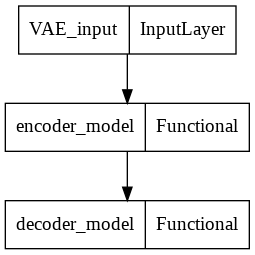

In [ ]:
plot_model(vae)

In [ ]:
from keras import backend as K
def dice_coeff(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  y_pred = tf.math.sigmoid(y_pred)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)
  return 1 - numerator / denominator
vae.compile(optimizer=keras.optimizers.Adadelta(lr=0.001), 
            loss='binary_crossentropy',metrics=[dice_coeff])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adadelta.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adadelta, self).__init__(name, **kwargs)


In [ ]:
y_train.shape

(2600, 128, 128, 3)

In [ ]:
hist=vae.fit(x_train, y_train, epochs=200, batch_size=128)

Epoch 1/200
21/21 [==============================] - 19s 255ms/step - loss: 0.7160 - dice_coeff: 0.8856
Epoch 2/200
21/21 [==============================] - 4s 212ms/step - loss: 0.7111 - dice_coeff: 0.8861
Epoch 3/200
21/21 [==============================] - 4s 214ms/step - loss: 0.7060 - dice_coeff: 0.8853
Epoch 4/200
21/21 [==============================] - 5s 215ms/step - loss: 0.7009 - dice_coeff: 0.8853
Epoch 5/200
21/21 [==============================] - 5s 217ms/step - loss: 0.6958 - dice_coeff: 0.8851
Epoch 6/200
21/21 [==============================] - 5s 217ms/step - loss: 0.6907 - dice_coeff: 0.8858
Epoch 7/200
21/21 [==============================] - 5s 220ms/step - loss: 0.6855 - dice_coeff: 0.8856
Epoch 8/200
21/21 [==============================] - 5s 222ms/step - loss: 0.6803 - dice_coeff: 0.8846
Epoch 9/200
21/21 [==============================] - 5s 228ms/step - loss: 0.6751 - dice_coeff: 0.8848
Epoch 10/200
21/21 [==============================] - 5s 228ms/step - lo

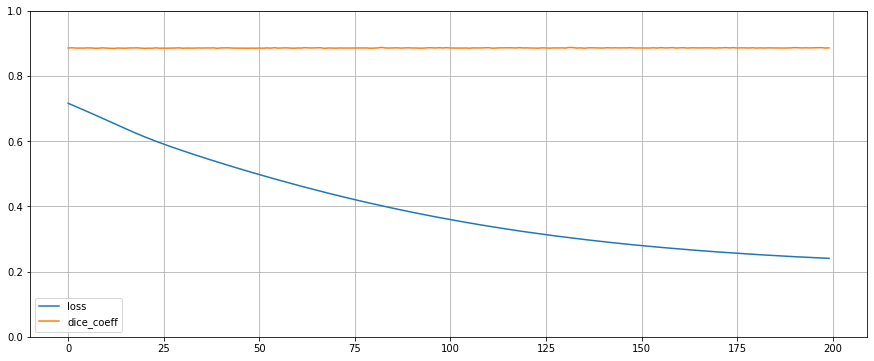

In [ ]:
pd.DataFrame(hist.history).plot()
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
vae.evaluate(x_test,y_test)

21/21 [==============================] - 2s 36ms/step - loss: 0.2430 - dice_coeff: 0.8856


[0.24299928545951843, 0.8856083750724792]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


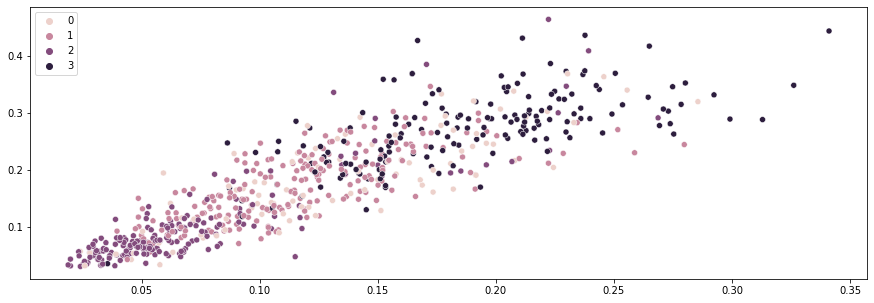

In [ ]:
import seaborn as sns
plt.rcParams['figure.figsize']=(15,5)
encoded=encoder(x_test)
class_names=np.array([0,1,2,3])
sns.scatterplot(encoded[:,0],encoded[:,1],hue=class_names[np.array(y_label,dtype=np.int)])
plt.show()

In [ ]:
preds=decoder.predict(encoder.predict(x_test))

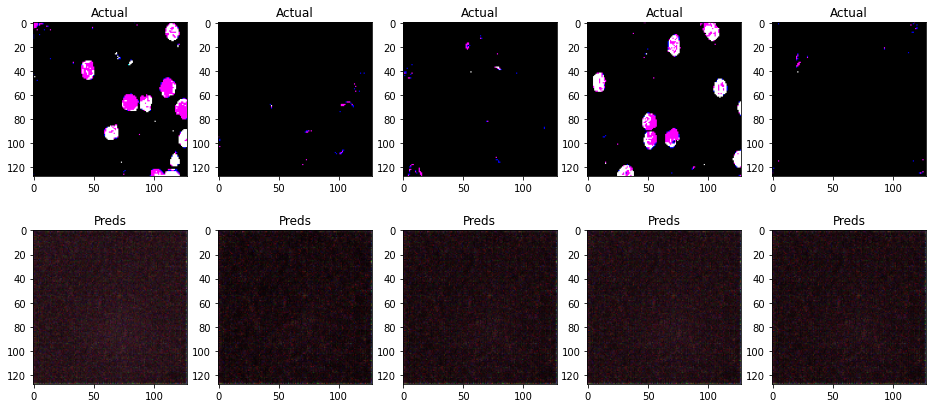

In [ ]:
plt.rcParams['figure.figsize']=(16,7)
for i in range(5):
  plt.subplot(2,5,i+1)
  plt.imshow((y_test[i]))
  plt.title('Actual')
  plt.subplot(2,5,i+6)
  plt.imshow(preds[i].reshape(128,128,3))
  plt.title('Preds')
plt.show()

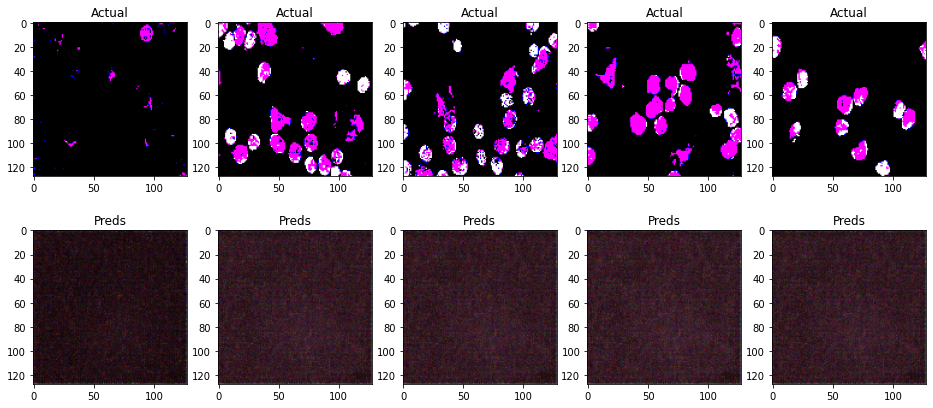

In [ ]:
plt.rcParams['figure.figsize']=(16,7)
for i in range(5):
  plt.subplot(2,5,i+1)
  plt.imshow((y_test[i+68]))
  plt.title('Actual')
  plt.subplot(2,5,i+6)
  plt.imshow(preds[i+68].reshape(128,128,3))
  plt.title('Preds')
plt.show()

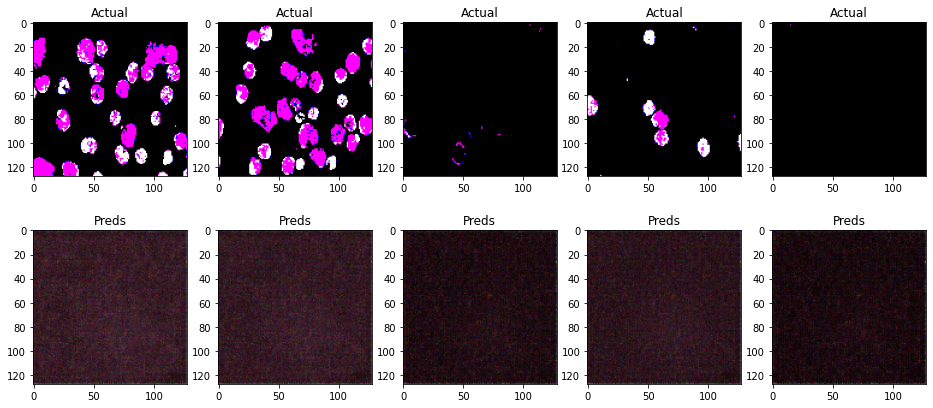

In [ ]:
plt.rcParams['figure.figsize']=(16,7)
for i in range(5):
  plt.subplot(2,5,i+1)
  plt.imshow((y_test[i+127]).reshape(128,128,3))
  plt.title('Actual')
  plt.subplot(2,5,i+6)
  plt.imshow(np.array(preds[i+127]).reshape(128,128,3))
  plt.title('Preds')
plt.show()

## Sagment

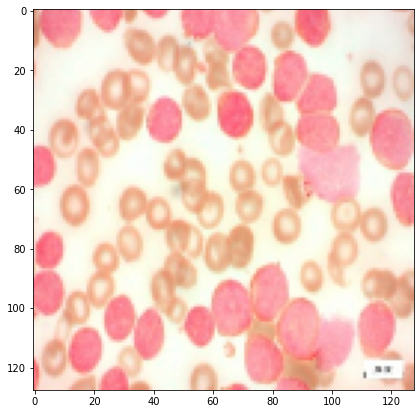

In [ ]:
plt.imshow(x_test[11])

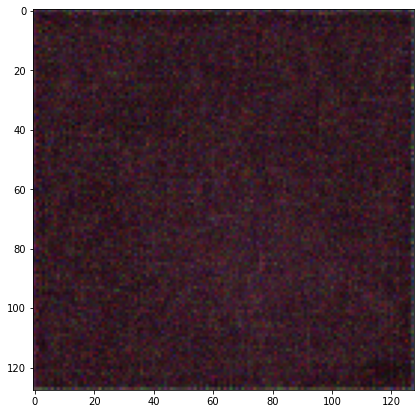

In [ ]:
plt.imshow(preds[11])

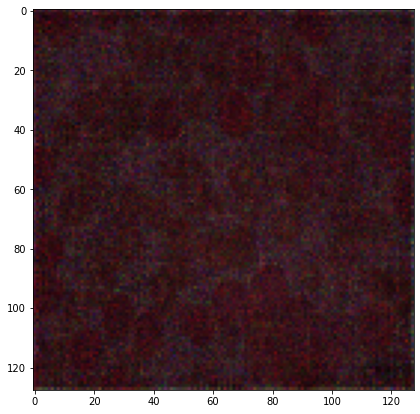

In [ ]:
plt.imshow(preds[11]*x_test[11])

Image - Mask - Sagmented Results

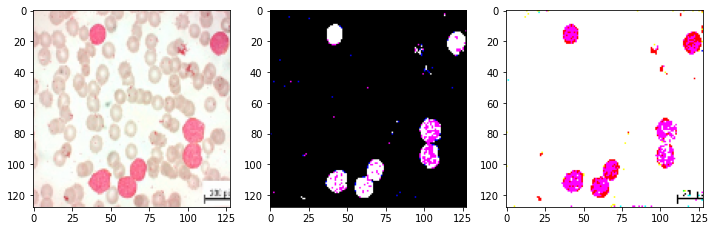

In [ ]:
plt.rcParams['figure.figsize']=(12,5)
plt.subplot(1,3,1)
plt.imshow(x_test[10])
plt.subplot(1,3,2)
plt.imshow(y_test[10])
plt.subplot(1,3,3)
plt.imshow(np.round(x_test[10]-(x_test[10]*preds[10])))
plt.show()

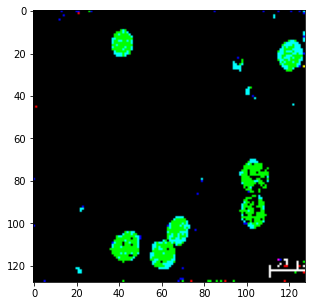

In [ ]:
plt.imshow(1-np.round(x_test[10]-(x_test[10]*preds[10])))

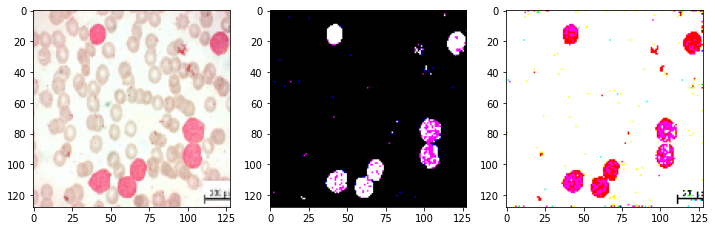

In [ ]:
plt.rcParams['figure.figsize']=(12,5)
plt.subplot(1,3,1)
plt.imshow(x_test[10])
plt.subplot(1,3,2)
plt.imshow(y_test[10])
plt.subplot(1,3,3)
plt.imshow(np.round(x_test[10]-preds[10]))
plt.show()

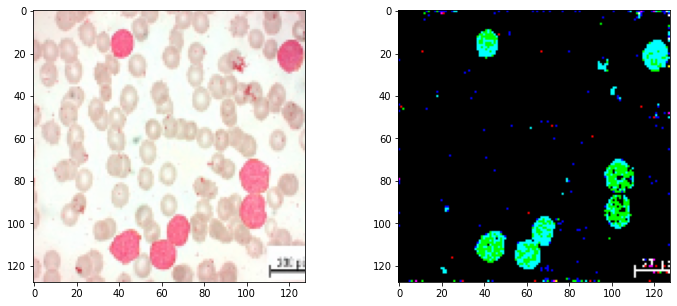

In [ ]:
plt.subplot(1,2,1)
plt.imshow(x_test[10])
plt.subplot(1,2,2)
plt.imshow(1-np.round(x_test[10]-preds[10]))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


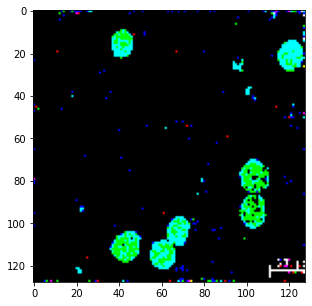

In [ ]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=1-np.round(x_test[10]-preds[10]), ddepth=-1, kernel=kernel)
plt.imshow(image_sharp)

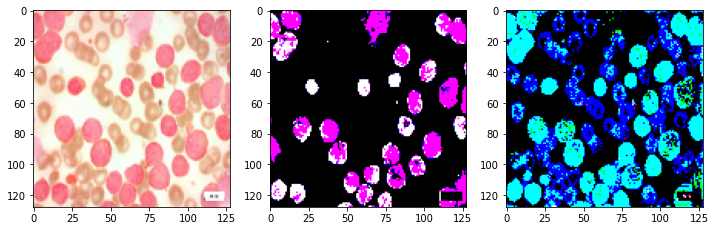

In [ ]:
plt.rcParams['figure.figsize']=(12,5)
plt.subplot(1,3,1)
plt.imshow(x_test[100])
plt.subplot(1,3,2)
plt.imshow(y_test[100])
plt.subplot(1,3,3)
plt.imshow(1-np.round((x_test[100]-preds[100])))
plt.show()

In [ ]:
x_test[100]-preds[100]

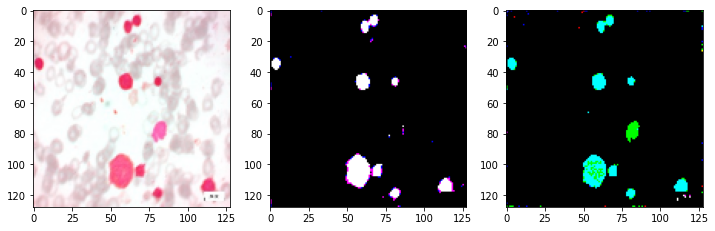

In [ ]:
plt.rcParams['figure.figsize']=(12,5)
plt.subplot(1,3,1)
plt.imshow(x_test[133])
plt.subplot(1,3,2)
plt.imshow(y_test[133])
plt.subplot(1,3,3)
plt.imshow(1-np.round(x_test[133]-preds[133]))
plt.show()

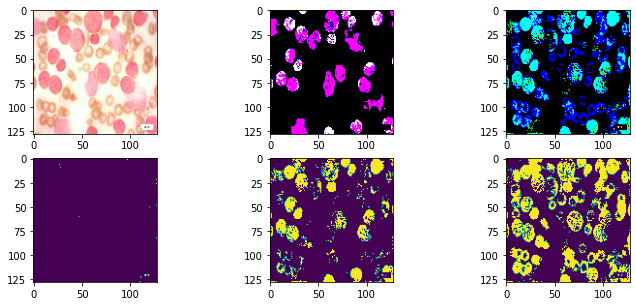

In [ ]:
plt.rcParams['figure.figsize']=(12,5)
plt.subplot(2,3,1)
plt.imshow(x_test[17])
plt.subplot(2,3,2)
plt.imshow(y_test[17])
plt.subplot(2,3,3)
plt.imshow(1-np.round(x_test[17]-preds[17]))

plt.subplot(2,3,4)
plt.imshow((1-np.round(x_test[17]-preds[17]))[:,:,0])
plt.subplot(2,3,5)
plt.imshow((1-np.round(x_test[17]-preds[17]))[:,:,1])
plt.subplot(2,3,6)
plt.imshow((1-np.round(x_test[17]-preds[17]))[:,:,2])

plt.show()

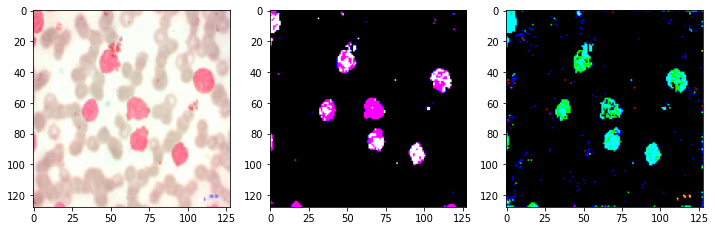

In [ ]:
plt.rcParams['figure.figsize']=(12,5)
plt.subplot(1,3,1)
plt.imshow(x_test[277])
plt.subplot(1,3,2)
plt.imshow(y_test[277])
plt.subplot(1,3,3)
plt.imshow(1-np.round(x_test[277]-preds[277]))
plt.show()

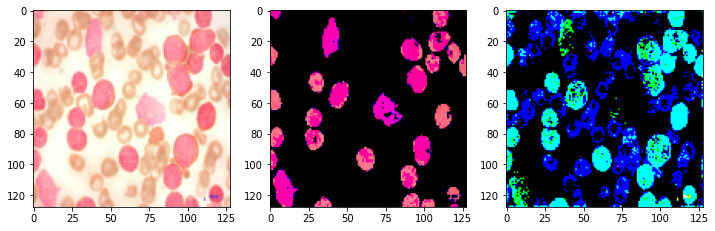

In [ ]:
plt.rcParams['figure.figsize']=(12,5)
plt.subplot(1,3,1)
plt.imshow(x_test[237])
plt.subplot(1,3,2)
plt.imshow(y_test[237]*x_test[237])
plt.subplot(1,3,3)
plt.imshow(1-np.round(((x_test[237]-preds[237]))))
plt.show()